# Homework 2

## 1. Feedforward: Building a ReLU neural network

### 1. Draw a network

<img src="1.jpg">

### 2. Write out the mathematical equation for the output of this network

Since the output is for binary classification, the activation function for the output is sigmoid $\sigma(x)=1/(1+e^{-x})$ \

$y=\sigma(v_1h_1+v_2h_2+v_3h_3+c)\\
 \ \ =\sigma(v_1max(0,w_{11}a_1+w_{21}a_1+b_{11})+\\
\ \ \ \ \ \ \ \sigma(v_2max(0,w_{12}a_1+w_{22}a_1+b_{12})+\\
\ \ \ \ \ \ \ \sigma(v_3max(0,w_{13}a_1+w_{23}a_1+b_{13})+\\
\ \ \ \ \ \ \  c)
$

### 3. Write out the forward-pass function in python, call it ff nn ReLu(...)

In [7]:
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
# Write out the ReLu and Sigmoid Functions first
def ReLu(x):
    return np.where(x>0,x,0)

def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
def ff_nn_ReLu(X,W,V,b,c):
    # x is the unputs;
    # W is the weight matrices for a;
    # V is the weight matrices for h;
    # b is the intercepts for h;
    # c is the intercept for y;
    h_input=np.dot(X,W)+b
    h_output=ReLu(h_input)
    y_input=np.dot(h_output,V)+c
    y_output=sigmoid(y_input)
    return y_output #sigmoid(V*(ReLu(x*W+b)+c))=y_output


### 4. Suppose the set of weight matrices are given as follows:

In [8]:
W = np.array([[1,-1,0],[0,0,0.5]])
b=np.array([0,0,1])
V=np.array([[1],[0],[-1]])
c=np.array([1])
X = np.array([[1,-1],[0,-1],[0,1]])
output=ff_nn_ReLu(X,W,V,b,c)
output

array([[0.81757448],
       [0.62245933],
       [0.37754067]])

#### So there are three samples for inputs: (1,-1), (0,-1), (0,1). And the outputs for the three samples are: 0.81757448, 0.62245933, 0.37754067. Since the output is for binary classification, suppose there are two class [0,1]. Then the first sample has 0.81757448 probability to be '1', the second has 0.62245933 and the third has 0.37754067.

## 2. Gradient Descent

Consider a simple non-convex function of two variables:
$$
f(x,y) = (1-x^3) + 100 * (y^2 - x)^2
$$

### 1. What are the partial derivatives of f with respect to x and to y?

For x: $df/dx=-3x^2+100*2*(y^2-x)*(-1)=-3x^2-200(y^2-x)$ \
For y: $df/dy=200*(y^2-x)*2y=400y(y^2-x)$    
    

### 2. Create a visualization of the contours of the Rosenbrock function.

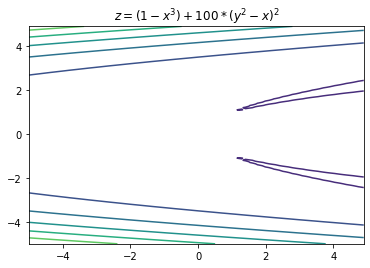

In [10]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

# the function that I'm going to plot
def z_func(x,y):
 return (1-x**3)+100*((y**2-x)**2)

x = arange(-5.0,5.0,0.1)
y = arange(-5.0,5.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
title('$z=(1-x^3)+100*(y^2-x)^2$')
show()

Use the 3D plotting capabilities to create a shaded surface plot

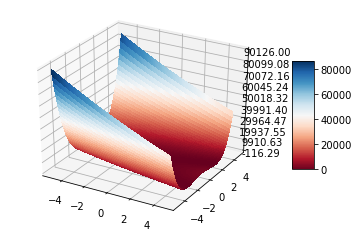

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### 3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [12]:
from __future__ import division
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import random

def grad_f(point):
    x,y=point
    dfdx=-3*x**2-200*(y**2-x)
    dfdy=400*(y**3)-400*x*y   
    return np.array([dfdx,dfdy])

In [13]:
def grad_descent(x, y, iters, learningrates):
    
    point = np.array([x,y])
    trajectory = [point]
    
    for i in range(iters):
        grad = grad_f(point)
        point = point - learningrates * grad
        trajectory.append(point)
        
    return np.array(trajectory)

### Leanrning rate = 0.001

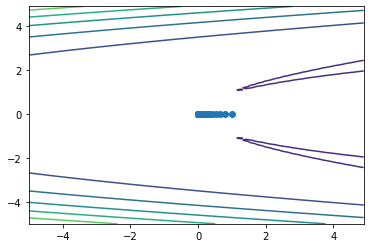

In [14]:
np.random.seed(100)
traj = grad_descent(1,0, iters=200, learningrates=0.001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### Leanrning rate = 0.005

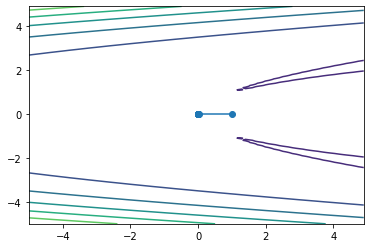

In [15]:
np.random.seed(100)
traj = grad_descent(1,0, iters=200, learningrates=0.005)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### Leanrning rate = 0.01

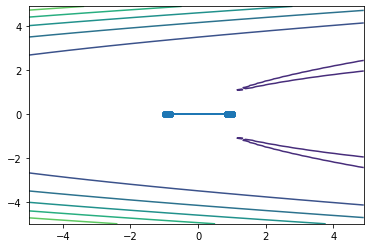

In [16]:
np.random.seed(100)
traj = grad_descent(1,0, iters=200, learningrates=0.01)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### 4. Write a Gradient Descent With Momentum algorithm for finding the mini- mum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [19]:
def grad_descent_momentum(x,y, iters, alpha, epsilon):
    #if x:
    point = np.array([x,y])
    #else:
       # point = np.random.uniform(-10,10,size=2)
   
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iters):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    
    return np.array(trajectory)

### alpha=0.005, epsilon=0.01

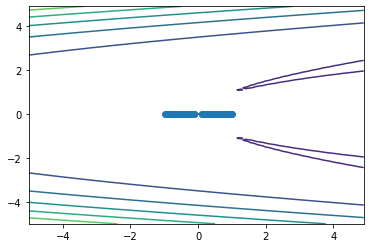

In [20]:
traj = grad_descent_momentum(1,0, iters=200, alpha=0.005,epsilon=0.01)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### alpha=0.001,epsilon=0.005

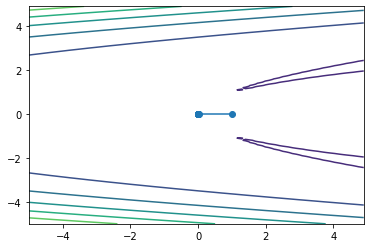

In [21]:
traj = grad_descent_momentum(1,0, iters=200, alpha=0.001,epsilon=0.005)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

###  alpha=0.05, epsilon=0.01

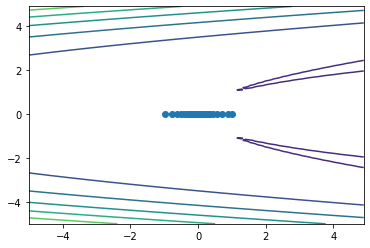

In [22]:
traj = grad_descent_momentum(1,0, iters=200, alpha=0.05,epsilon=0.01)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## 3.Backprop

### 1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

Binary Corss Entropy: $L=-y_i log(\hat{y_i})-(1-y_i)log(1-\hat{y_i})$ \
So $\frac{dL}{d\hat{y_{out}}} = -(\frac{y_i}{\hat{y_i}}-\frac{1-y_i}{1-\hat{y_i}})$\
$\frac{d\hat{y_{out}}}{d\hat{y_{in}}}=\sigma(\hat{y_{in}})(1-\sigma(\hat{y_{in}}))$\
And $\hat{y_{in}}=v_1h_1+v_2h_2+v_3h_3+b_2$\
$\frac{dL}{db_2}=\frac{dL}{d\hat{y_{out}}}\frac{d\hat{y_{out}}}{d\hat{y_{in}}}\frac{d\hat{y_{in}}}{db_2}=\frac{dL}{d\hat{y_{out}}}\frac{d\hat{y_{out}}}{d\hat{y_{in}}}$\
$\frac{dL}{dv_i}=\frac{dL}{d\hat{y_{out}}}\frac{d\hat{y_{out}}}{d\hat{y_{in}}}\frac{d\hat{y_{in}}}{dv_i}=\frac{dL}{d\hat{y_{out}}}\frac{d\hat{y_{out}}}{d\hat{y_{in}}}h_{i,out}$\
Since $h_{out}=max(0,h_{input})$\
$\frac{dh_{i,out}}{dh_{i,in}}=\left\{
\begin{aligned}
0,h_{i,in}<0\\
1,h_{i,in}>0
\end{aligned}
\right.$\
$\frac{dL}{db_{1i}}=\frac{dL}{d\hat{y_{out}}}\frac{d\hat{y_{out}}}{d\hat{y_{in}}}\frac{d\hat{y_{in}}}{dh_{i,out}}\frac{dh_{i,out}}{dh_{i,in}}\frac{dh_{i,in}}{db_{1i}}=\frac{dL}{d\hat{y_{out}}}\frac{d\hat{y_{out}}}{d\hat{y_{in}}}\frac{d\hat{y_{in}}}{dh_{i,out}}\frac{dh_{i,out}}{dh_{i,in}}$\
$\frac{dL}{dw_{ji}}=\frac{dL}{d\hat{y_{out}}}\frac{d\hat{y_{out}}}{d\hat{y_{in}}}\frac{d\hat{y_{in}}}{dh_{i,out}}\frac{dh_{i,out}}{dh_{i,in}}\frac{dh_{i,in}}{dw_{ji}}=\frac{dL}{d\hat{y_{out}}}\frac{d\hat{y_{out}}}{d\hat{y_{in}}}\frac{d\hat{y_{in}}}{dh_{i,out}}\frac{dh_{i,out}}{dh_{i,in}}a_j$

### 2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [26]:
def params_in(all_parameters):
    w_11, w_12, w_13, w_21, w_22, w_23, b_11, b_12, b_13, v_1, v_2, v_3, b_2 = all_parameters
    W = np.array([[w_11,w_12,w_13],[w_21,w_22,w_23]])
    b1 = np.array([b_11, b_12, b_13])
    v = np.array([v_1, v_2, v_3])
    b2 = b_2
    return((W, b1, v, b2))
    
def params_out(W,b1,v,b2):
    w_11, w_12, w_13, w_21, w_22, w_23 = W[0,0], W[0,1],W[0,2], W[1,0], W[1,1], W[1,2]
    b_11, b_12, b_13 = b1[0], b1[1], b1[2]
    v_1, v_2, v_3 = v[0], v[1], v[2]
    b_2 = b2
    return np.array([w_11, w_12, w_13, w_21, w_22, w_23, b_11, b_12, b_13, v_1, v_2, v_3, b_2])

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return  -tot.sum()

def derivate_L_y(y, y_hat):
    return -(y/y_hat - (1-y)/(1-y_hat))

def yhat(x, W, b1, v, b2):
    # returns model prediction 
    h_in = x.dot(W) + b1
    h_out = relu(h_in)
    yy = h_out.dot(v) + b2
    y_hat = sigmoid(yy)
    return y_hat


In [27]:
def grad_f(all_parameters, x, y):
    
    W, b1, v, b2 = params_in(all_parameters)
    v_new = np.reshape(v, (1,3))
    
    
    h_in = x.dot(W) + b1
    h_out= relu(h_in)
    yy = h_out.dot(v) + b2
    y_hat = sigmoid(yy)

    y_sigmoid = derivate_L_y(y, y_hat) * sigmoid_derivative(yy) 
    y_sigmoid_new = np.reshape(y_sigmoid,(500,1))
    
    d_v =  h_out.T.dot(y_sigmoid_new)
    d_b2 = y_sigmoid.sum(axis=0)
    d_b1 = (y_sigmoid_new.dot(v_new)*(h_out > 0)).sum(axis=0)
    d_W = x.T.dot(y_sigmoid_new.dot(v_new)*(h_out > 0))
    
    all_parameters = params_out(d_W,d_b1,d_v,d_b2)
    return np.array(all_parameters)

def grad_descent(x, y,  iters, learningrates):
    point = np.random.uniform(-.1,.1,size=13).astype(float)
    trajectory = [point]
    losses = [loss(y, yhat(x, *params_in(point)))]
    
    for i in range(iters):
        grad = grad_f(point, x, y)
        point = point - learningrates * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, * params_in(point))))
    return (np.array(trajectory), losses)

### 3. Generate a synthetic dataset like the XOR pattern (see below).

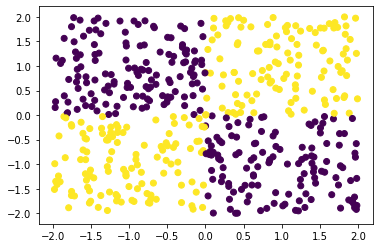

In [23]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1

plt.scatter(x[:,0], x[:,1], c=y)

### 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [153]:
traj, losses = grad_descent(x, y, iters=50,learningrates=1e-2)

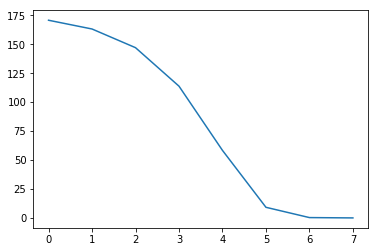

In [154]:
plt.plot(losses)

### 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [89]:
def grad_descent_with_momentum(x, y,  iters, alpha, epsilon):
    point = np.random.uniform(-.1,.1,size=13).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *params_in(point)))]
    v = np.zeros(point.size)
    
    for i in range(iters):
        grad = grad_f(point, x, y)
        v = alpha*v + epsilon*grad
        point = point -  v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *params_in(point))))
    return (np.array(trajectory), losses)

In [90]:
traj, losses = grad_descent_with_momentum(x, y,  iters=100, alpha=0.005, epsilon=1e-2)

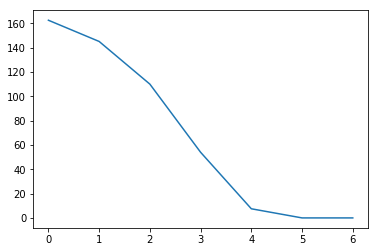

In [91]:
plt.plot(losses)

#### Yes, algorithm seems to converge more efficiently with  Momentum, we can observe that the converge steps reduced.

### 6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

In [219]:
weights = traj[4]
W, b1, v, b2 = params_in(weights)

In [220]:
def model(x):
    z = []
    for i in x:
        a1 = i.dot(W) + b1
        H = relu(a1)
        a2 = H.dot(v) + b2
        y_hat = sigmoid(a2)
        z.append(y_hat)
    z = [1 if i > 0.8 else 0 for i in z ]
    z_array = np.array(z)
    return z_array

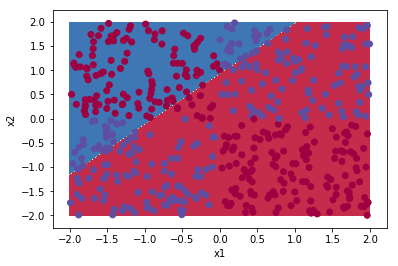

In [221]:
x_min, x_max = -2,2
y_min, y_max = -2,2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))   

Z = model(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)   
# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(x[:,0], x[:,1],  c=np.squeeze(y), cmap=plt.cm.Spectral)
plt.show()